## yahoo finance api

In [34]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
from finviz.screener import Screener
from datetime import datetime
from finviz.helper_functions.request_functions import http_request_get
from finviz.helper_functions.scraper_functions import get_table
import nest_asyncio
import seaborn as sns
import timeit

In [8]:
tickr = yf.Ticker("xei.to")

In [9]:
tickr.info

HTTPError: HTTP Error 404: Not Found

In [6]:
# get stock info
tickr.info['trailingEps']

HTTPError: HTTP Error 404: Not Found

In [ ]:
tickr.info['forwardEps']

In [13]:
tickr.info['trailingPE']

KeyError: 'trailingPE'

In [12]:
tickr.info['forwardPE']

-441.75

In [ ]:
tickr.info['dividendRate']

In [ ]:
tickr.info['trailingAnnualDividendYield'] # per share

In [10]:
# get historical market data
hist = tickr.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2012-01-24,12.41,12.41,12.35,12.35,5600,0.000,0
2012-01-25,12.34,12.34,12.33,12.33,6200,0.077,0
2012-01-26,12.31,12.31,12.20,12.20,2600,0.000,0
2012-01-27,12.18,12.20,12.17,12.20,4200,0.000,0
2012-01-30,12.13,12.19,12.11,12.18,8900,0.000,0
...,...,...,...,...,...,...,...
2021-09-27,24.12,24.26,24.12,24.19,52300,0.000,0
2021-09-28,24.22,24.22,23.97,24.01,85900,0.000,0
2021-09-29,24.04,24.17,24.00,24.04,52900,0.000,0


In [174]:
hist.tail(90).index[[0, 10, 20, 30, 40, 50, 60, 70, 80]]

DatetimeIndex(['2020-11-03', '2020-11-17', '2020-12-01', '2020-12-15',
               '2020-12-31', '2021-01-15', '2021-01-29', '2021-02-12',
               '2021-03-01'],
              dtype='datetime64[ns]', name='Date', freq=None)

[0, 29, 58, 87]

In [11]:
hist3M = hist.tail(90)['Close']
hist1Y = hist.tail(365)['Close']
hist.tail(300).index

DatetimeIndex(['2020-07-23', '2020-07-24', '2020-07-27', '2020-07-28',
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-04',
               '2020-08-05', '2020-08-06',
               ...
               '2021-09-20', '2021-09-21', '2021-09-22', '2021-09-23',
               '2021-09-24', '2021-09-27', '2021-09-28', '2021-09-29',
               '2021-09-30', '2021-10-01'],
              dtype='datetime64[ns]', name='Date', length=300, freq=None)

In [12]:
hist['tp'] = (hist['High']+hist['Low']+hist['Close'])/3
hist['ma'] = hist['tp'].rolling(20).mean()
hist['stdv'] = hist['tp'].rolling(20).std()
hist['bolu'] = hist['ma'] + ( 2 * hist['stdv'] )
hist['bold'] = hist['ma'] - ( 2 * hist['stdv'] )
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,tp,ma,stdv,bolu,bold
Date,,,,,,,,,,,,
2012-01-24,12.41,12.41,12.35,12.35,5600,0.000,0,12.370000,NaN,NaN,NaN,NaN
2012-01-25,12.34,12.34,12.33,12.33,6200,0.077,0,12.333333,NaN,NaN,NaN,NaN
2012-01-26,12.31,12.31,12.20,12.20,2600,0.000,0,12.236667,NaN,NaN,NaN,NaN
2012-01-27,12.18,12.20,12.17,12.20,4200,0.000,0,12.190000,NaN,NaN,NaN,NaN
2012-01-30,12.13,12.19,12.11,12.18,8900,0.000,0,12.160000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-27,24.12,24.26,24.12,24.19,52300,0.000,0,24.190000,23.891333,0.151377,24.194088,23.588579
2021-09-28,24.22,24.22,23.97,24.01,85900,0.000,0,24.066667,23.905500,0.153974,24.213448,23.597552
2021-09-29,24.04,24.17,24.00,24.04,52900,0.000,0,24.070000,23.921833,0.153190,24.228214,23.615453


## Plotting

In [13]:
[x for x in range(0,89,89//3)]

[0, 29, 58, 87]

In [14]:
price_now = hist.tail()
val = (price_now/hist.iloc(0)) * 100

TypeError: '_AtIndexer' object is not callable

In [15]:
fig,ax=plt.plot(hist.index, hist['tp'].values, hist['ma'].values)
#     plt.title(f"{tickr.info['symbol']} Stock History")
plt.ylabel('Close Price')
plt.xlabel('Year')
#     ax.set_xticks(hist.index[[x for x in range(0, len(self.hist), len(self.hist)//3)]])
plt.show()

ValueError: view limit minimum -36883.25 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

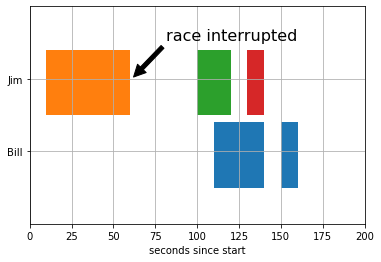

In [10]:
fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='tab:blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('tab:orange', 'tab:green', 'tab:red'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25])
ax.set_yticklabels(['Bill', 'Jim'])
ax.grid(True)
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()

## more yfinance object members

In [42]:
type(hist)

pandas.core.frame.DataFrame

In [16]:
# show actions (dividends, splits)
tickr.actions

,Dividends,Stock Splits
Date,,
2012-01-25,0.077,0.0
2012-02-22,0.077,0.0
2012-03-23,0.077,0.0
2012-04-23,0.075,0.0
2012-05-23,0.075,0.0
...,...,...
2021-05-21,0.076,0.0
2021-06-24,0.076,0.0
2021-07-26,0.078,0.0


In [17]:
# show dividends
tickr.dividends

Date
2012-01-25    0.077
2012-02-22    0.077
2012-03-23    0.077
2012-04-23    0.075
2012-05-23    0.075
              ...  
2021-05-21    0.076
2021-06-24    0.076
2021-07-26    0.078
2021-08-25    0.078
2021-09-24    0.078
Name: Dividends, Length: 117, dtype: float64

In [18]:
# show splits
tickr.splits

Series([], Name: Stock Splits, dtype: int64)

In [19]:
# show financials
tickr.financials


HTTPError: HTTP Error 404: Not Found

In [20]:
tickr.quarterly_financials

HTTPError: HTTP Error 404: Not Found

In [21]:
# show major holders
tickr.major_holders

HTTPError: HTTP Error 404: Not Found

In [22]:
# show institutional holders
tickr.institutional_holders

HTTPError: HTTP Error 404: Not Found

In [23]:
# show balance heet
tickr.balance_sheet

HTTPError: HTTP Error 404: Not Found

In [24]:
    tickr.quarterly_balance_sheet

HTTPError: HTTP Error 404: Not Found

In [25]:
# show cashflow
tickr.cashflow

HTTPError: HTTP Error 404: Not Found

In [26]:
tickr.quarterly_cashflow

HTTPError: HTTP Error 404: Not Found

In [27]:
# show earnings
tickr.earnings

HTTPError: HTTP Error 404: Not Found

In [28]:
tickr.quarterly_earnings

HTTPError: HTTP Error 404: Not Found

In [24]:
# show sustainability
tickr.sustainability

,Value
2020-3,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,9.87
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [29]:
# show analysts recommendations
tickr.recommendations

HTTPError: HTTP Error 404: Not Found

In [30]:
# show next event (earnings, etc)
tickr.calendar

HTTPError: HTTP Error 404: Not Found

In [31]:
# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
tickr.isin

HTTPError: HTTP Error 404: Not Found

In [32]:
# show options expirations
tickr.options

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [33]:
# get option chain for specific expiration
opt = tickr.option_chain('2020-07-01')
opt
# data available via: opt.calls, opt.puts

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

## String manip, lists, map, permutations

In [35]:
entry = [6.12, 2.32, 118.26, 22.28, 66.37, 33.95, 32.50, 16.95, 21.07, 149.81]
exit = [ x*4 for x in entry]
exit

[24.48, 9.28, 473.04, 89.12, 265.48, 135.8, 130.0, 67.8, 84.28, 599.24]

In [13]:
s = 'wow'
print(s.swapcase())

WOW


In [9]:
3//5 # integer division

0

In [12]:
# create dictionary from two lists
l1 = ['a',1,"who"]
l2 = [1,2,3,4]
dict(zip(l1,l2))

{'a': 1, 1: 2, 'who': 3}

In [14]:
# A Python program to print all 
# permutations using library function 
from itertools import permutations 
  
# Get all permutations of [1, 2, 3] 
perm = permutations([1, 2, 3]) 
  
# Print the obtained permutations 
for i in list(perm): 
    print (i) 

3

In [15]:
c = [1,2,3,len(l1)] #list

In [40]:
c

[1, 2, 3, 3]

In [3]:
# [x for x in c if x != 1]
n = 10
[i for i in range(1,n+1) if n%i == 0]

[1, 2, 5, 10]

In [21]:
nm = input().split(' ')
m = nm[1]
n = nm[0]

['2', '3']

In [24]:
if '2' in nm:
    print('yup')

yup


In [39]:
a=map(int, input().split())
m,n =list(a)
type(m)

1 2


int

In [11]:
a = (map(int,input()))
a

1


In [42]:
n= int(input())
a = []
for i in range(0,n):
    a.append(list(map(int,input().split())))

3
1 1 1
1 1 1
1 1 1


In [83]:
while 1:
    a=input()
    if a=='':
        break
    print(a)
    

a
a
gvbhgvh
gvbhgvh



In [81]:
maxr,maxri = [0,0]

## Some datetime stuff

In [1]:
import datetime

In [9]:
a = datetime.datetime.now()
for i in range(5): 
    a += datetime.timedelta(days=1)
str(a)

'2021-04-30 22:48:26.383642'

In [64]:
f = open("info.txt", "w")
f.write(str(datetime.datetime.now()))
f.close()

In [60]:
str(datetime.datetime.now())

'2021-03-01 00:15:34.205158'

In [90]:
s='12334435679'
for c in s[1:len(s)-1]:
    print(c)

2
3
3
4
4
3
5
6
7


In [103]:
# max consecutive 1's in binary
count=0
maxcount=0
for x in bin(439)[2::]:
    #print(x)
    if x == '1':
        count+=1
        if count>maxcount:
            maxcount=count
    elif x == '0':
        count = 0
print(maxcount)

3


In [102]:
bin(439) #decimal to binary

'0b110110111'

In [4]:
set(['23', 'fds'])

{'23', 'fds'}

## Requests 

In [106]:
import requests
ip="104.200.132.109"  # get location from ip
response = requests.get(f"https://geolocation-db.com/json/{ip}&position=true").json()
response

{'country_code': 'CA',
 'country_name': 'Canada',
 'city': 'Vancouver',
 'postal': 'V6E',
 'latitude': 49.2833,
 'longitude': -123.1298,
 'IPv4': '104.200.132.109',
 'state': 'British Columbia'}

## Sets, more lists, dicts and pandas

In [122]:
s1 = set([1,2,3,4,5,6,7,8,9])
print(s1)
s2 = set(map(int,"10 1 2 3 11 21 55 6 8".split()))
print(s2)
s2=s2.union(s1)
print(len(s2))
s1

{1, 2, 3, 4, 5, 6, 7, 8, 9}
{1, 2, 3, 6, 8, 10, 11, 21, 55}
13


{1, 2, 3, 4, 5, 6, 7, 8, 9}

In [132]:
grid = ['1112', '1912', '1892', '1234']
grid[1].replace(grid[1][1],'X')

'1X12'

In [23]:
a = (1,2)
type(a)

tuple

In [146]:
i=ord('s')
i

115

In [26]:
df = pd.DataFrame(columns=['a', 'b', 'c'])
df = df.append(
pd.Series(['s',1,(1,2)], index=['a', 'b', 'c']),
ignore_index=True)
df

,a,b,c
0,s,1,"(1, 2)"


## portfolio tracking

In [35]:
positions_list = ['tlry.to', 'gold.to', 'wmt', 'ac.to', 'l.to', 'cgx.to', 'vcn.to', 'xei.to', 'xqb.to', 'huv.to']
entry_list = [6.12, 2.32, 118.26, 22.28, 66.37, 33.95, 32.50, 16.95, 21.07, 149.81]
positions_dict = {'symbol':positions_list, 'entry': entry_list}
positions_df = pd.DataFrame.from_dict(positions_dict)
positions_df

,symbol,entry
0,apha.to,6.12
1,gold.to,2.32
2,wmt,118.26
3,ac.to,22.28
4,l.to,66.37
5,cgx.to,33.95
6,vcn.to,32.50
7,xei.to,16.95
8,xqb.to,21.07
9,huv.to,149.81


In [48]:
positions_df = positions_df.append(pd.Series('a', 'b'))

TypeError: Index(...) must be called with a collection of some kind, 'b' was passed

ValueError: If using all scalar values, you must pass an index

{'symbol': ['apha.to',
  'gold.to',
  'wmt',
  'ac.to',
  'l.to',
  'cgx.to',
  'vcn.to',
  'xei.to',
  'xqb.to',
  'huv.to'],
 'entry': [6.12,
  2.32,
  118.26,
  22.28,
  66.37,
  33.95,
  32.5,
  16.95,
  21.07,
  149.81]}